# Laboratory session 3
***

**Author:** Rinaldi Luca 

### Exercise 1
***
<center>
$ f(X)= \cases {\frac{2(x-a)}{(b-a)(c-a)} \hspace{1.2cm} a \leq x<c \\
                \frac{2(b-x)}{(b-a)(b-c)} \hspace{1.2cm} c \leq x\leq b \\
                0   \hspace{2.7cm} otherwise}$
</center>

In [1]:
dtri <- Vectorize(function(x,a,b,c) {
                 if      (x>=a & x<c)  {return(2*(x-a)/((b-a)*(c-a)))}
                 else if (x>=c & x<=b) {return(2*(b-x)/((b-a)*(b-c)))}
                 else                  {return(0)}})


#### 1.a)

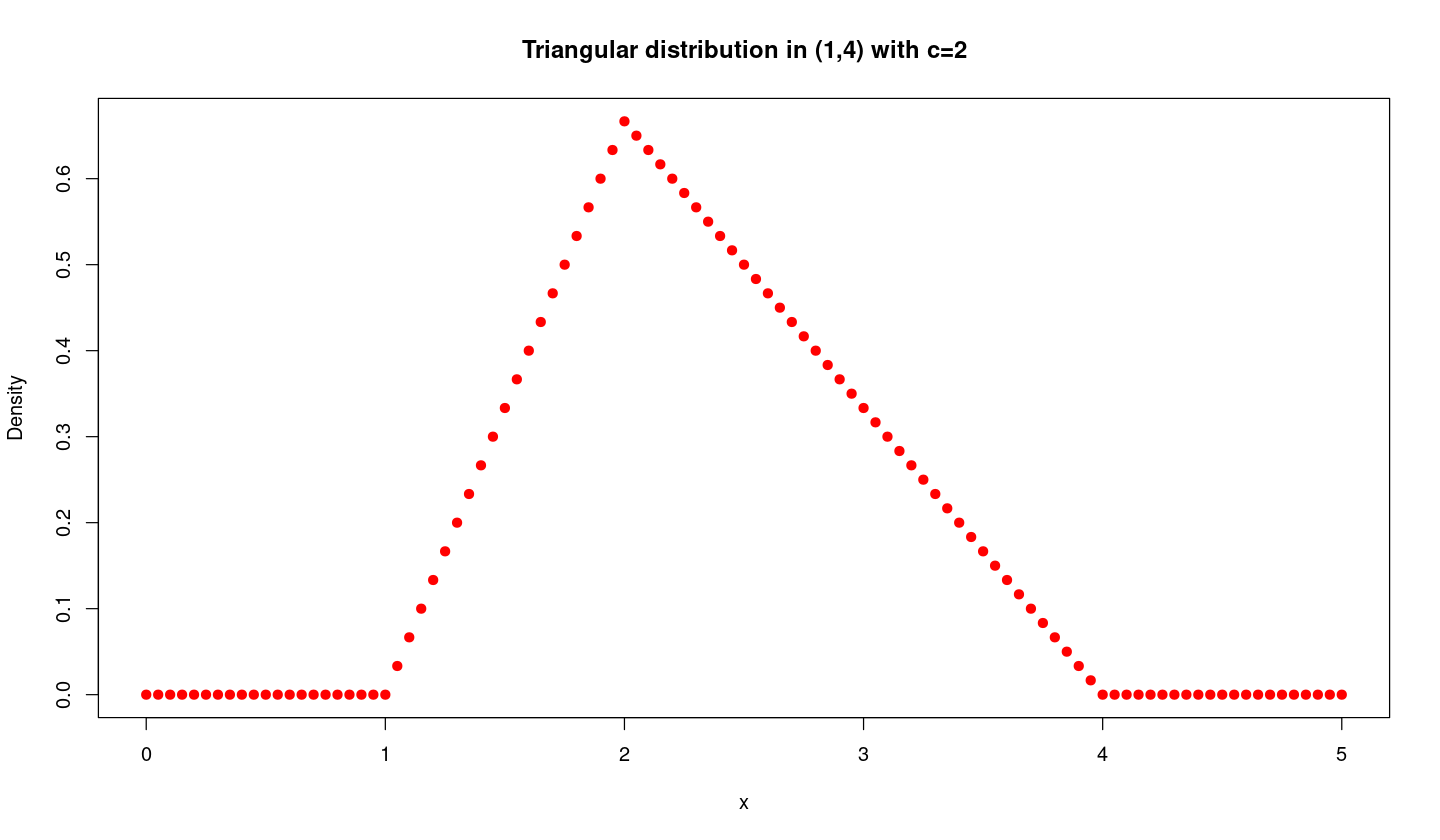

In [2]:
a <- 1
b <- 4
c <- 2
x <- seq(0,5,0.05)
options(repr.plot.width=12, repr.plot.height=7)
plot(x,dtri(x,a,b,c), main=paste('Triangular distribution in (',as.character(a),',',as.character(b),
                                 ') with c=',as.character(c), sep=''),
     xlab='x', ylab='Density',col='red',pch=19)

#### 1.b)

In [3]:
library(GoFKernel)
ptri <- Vectorize(function(x,a,b,c) {
                 if      (x<a)         {return(0)}
                 else if (x>=a & x<=b) {return(integrate(dtri,a,x,a=a,b=b,c=c)$value)}
                 else                  {return(1)}})

qtri <- Vectorize(function(p,a,b,c) {
                 tmp <- function(x) {ptri(x,a,b,c)}
                 return(inverse(tmp,lower=a,upper=b)(p))})

rtri <- function(n,a,b,c) { p_vec <- runif(n)
                     return(qtri(p_vec,a,b,c))}

Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009



#### 1.c)

In [4]:
samples <- rtri(1e4,a,b,c)

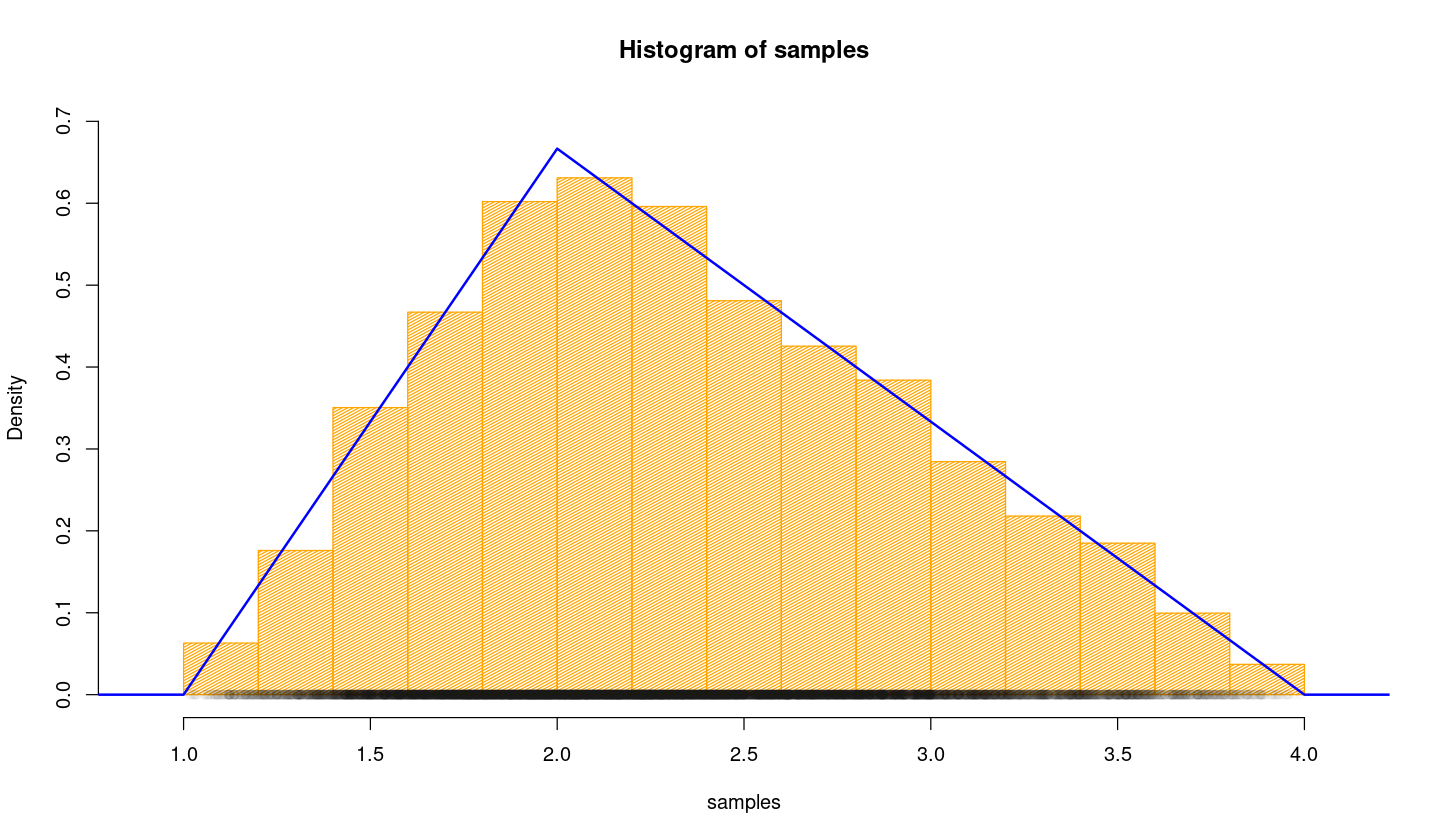

In [5]:
hist(samples,probability=TRUE,col='orange',density=60,xlim=c(a-0.1,b+0.1),ylim=c(0,0.7) )
lines(x,dtri(x,a,b,c),col='blue',lwd = 2)
points(samples,rep(0,length(samples)),pch=19, col=rgb(0,0,0,alpha = 200/length(samples)))

### Exercise 2
***
Markov's inequality represent an upper bound to probability distributions:

<center>
$ P(X \geq k) \leq \frac{E[X]}{k} \hspace{0.5cm} $for$\hspace{0.5cm} k > 0$
</center>

having defined a function
<center>
    $G(k) = 1 - F(k) \equiv P(X \geq k) $

#### 2.a)

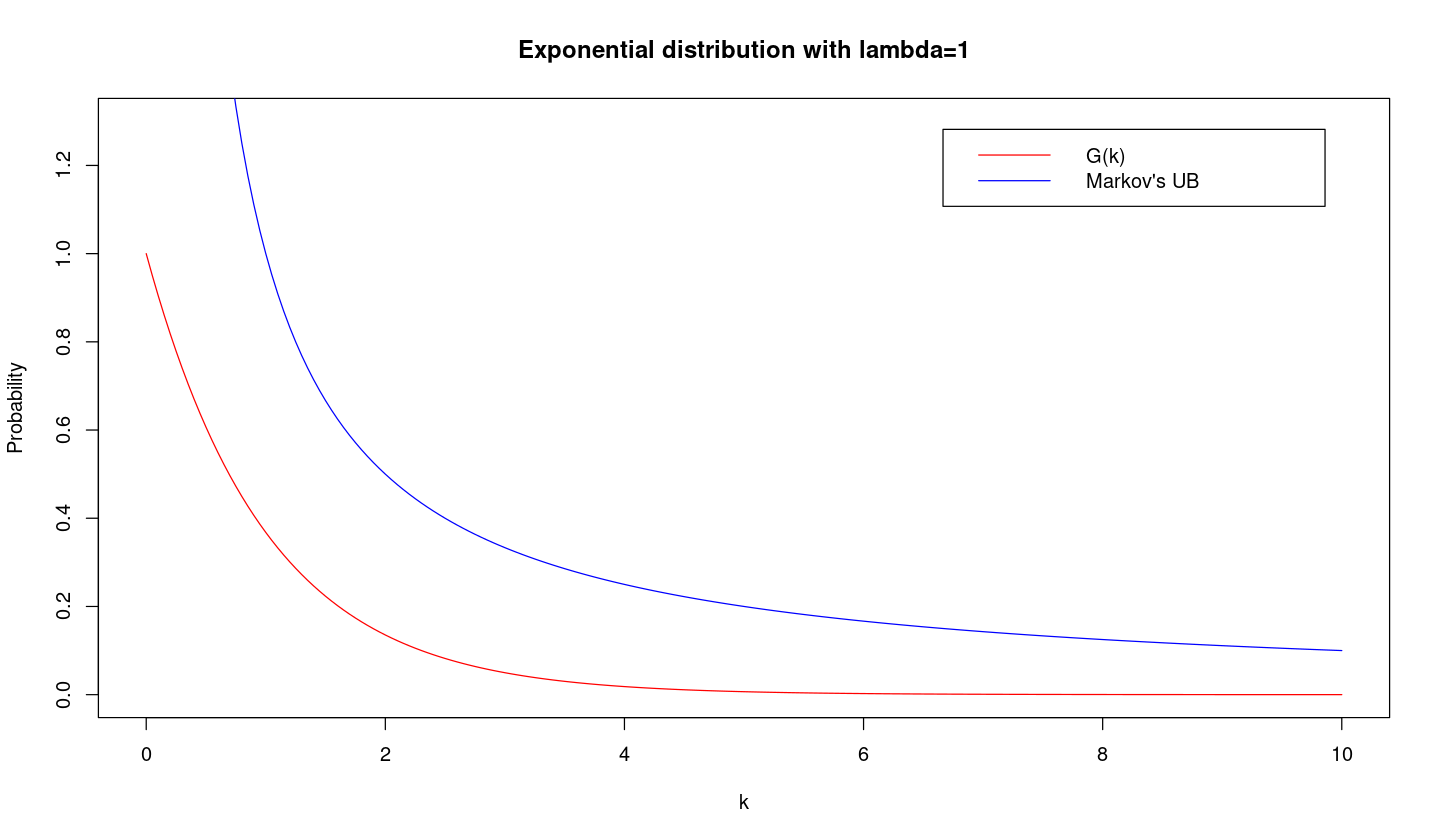

In [6]:
lambda <- 1
x <- seq(0,10,0.05)
E <- 1/lambda

plot(x,1-pexp(x,lambda),type='l',col='red',main=paste('Exponential distribution with lambda=',lambda,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,E/x,col='blue')
legend('topright',inset=0.05,legend=c('G(k)','Markov\'s UB'),col=c('red','blue'), lty=1)

#### 2.b)

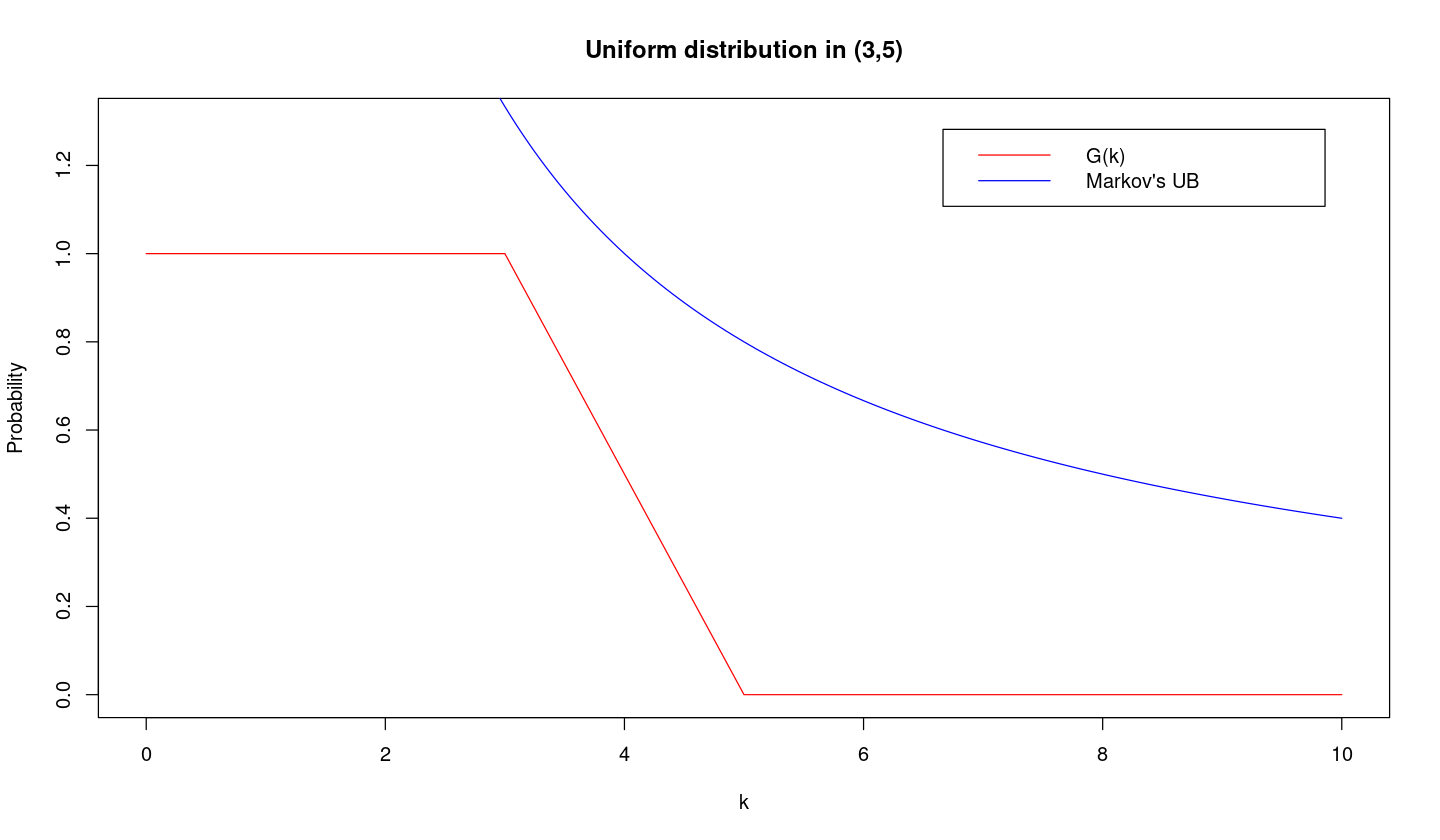

In [7]:
x <- seq(0,10,0.05)
a <- 3
b <- 5
E <- (a+b)/2

plot(x,1-punif(x,a,b),type='l',col='red',main=paste('Uniform distribution in (',a,',',b,')',sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,E/x,col='blue')
legend('topright',inset=0.05,legend=c('G(k)','Markov\'s UB'),col=c('red','blue'), lty=1)

#### 2.c)

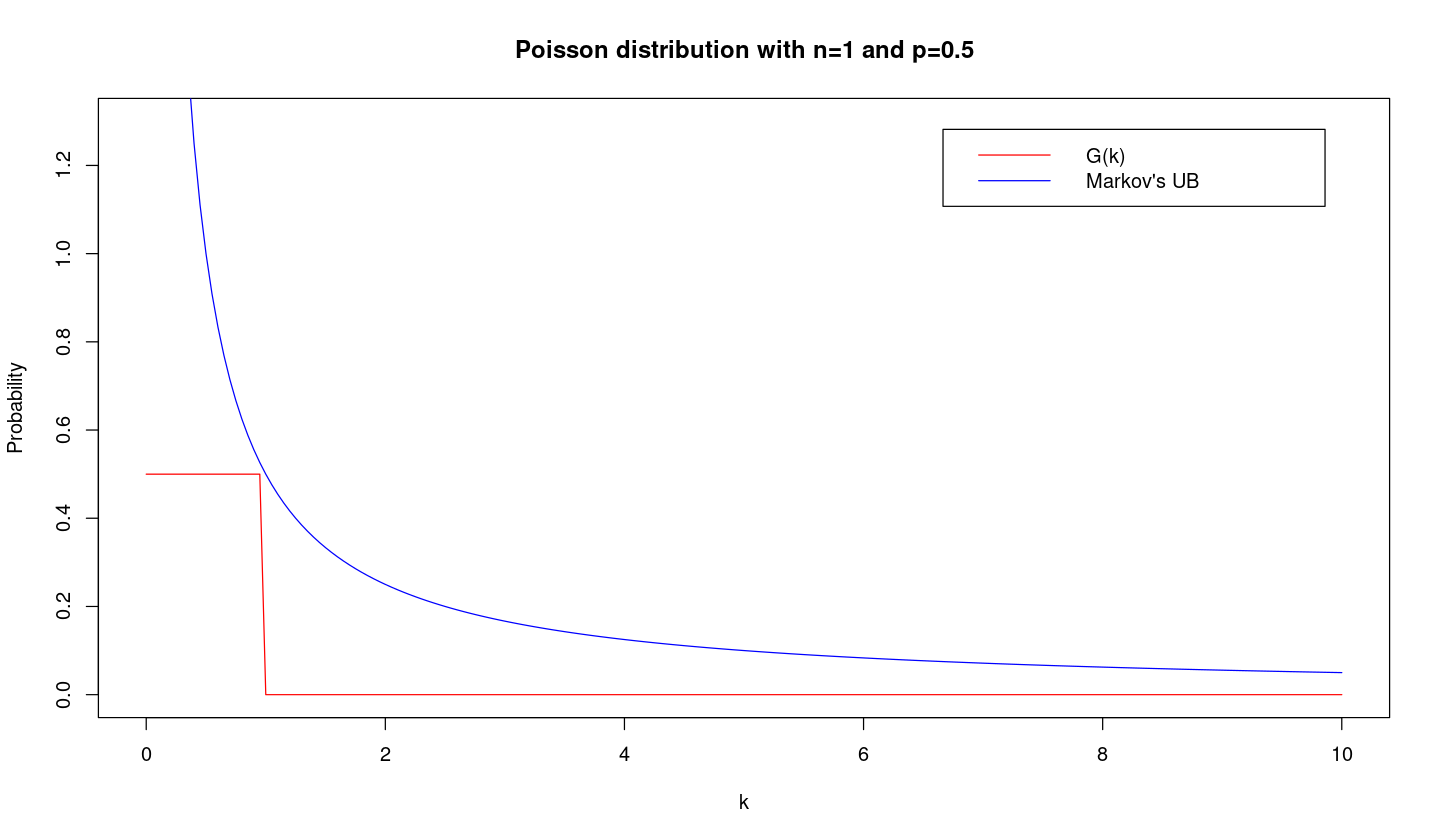

In [8]:
x <- seq(0,10,0.05)
n <- 1
p <- 1/2
E <- n*p

plot(x,1-pbinom(x,n,p),type='l',col='red',main=paste('Poisson distribution with n=',n,' and p=',p,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,E/x,col='blue')
legend('topright',inset=0.05,legend=c('G(k)','Markov\'s UB'),col=c('red','blue'), lty=1)

#### 2.d)

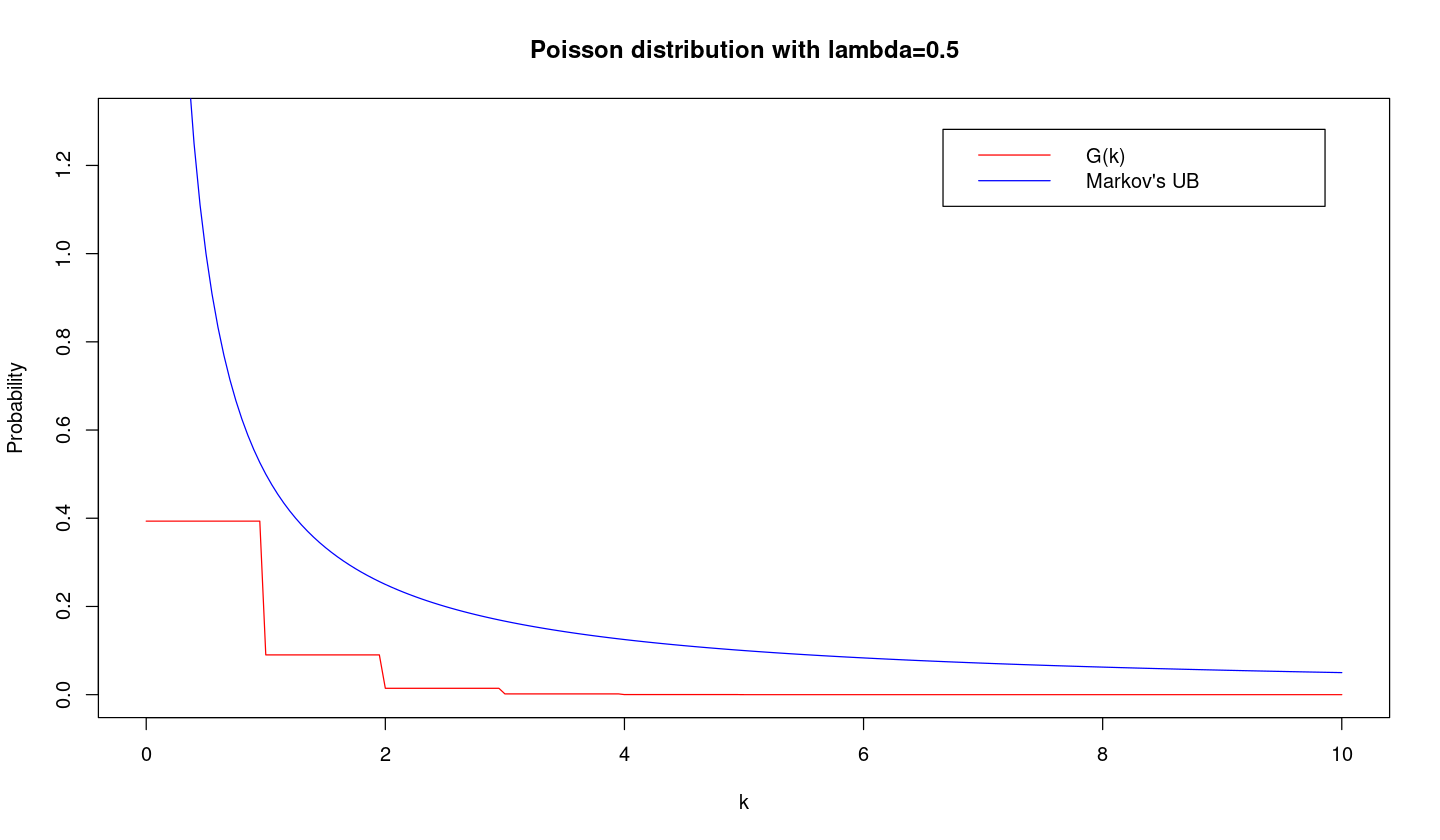

In [9]:
lambda <- 1/2
x <- seq(0,10,0.05)
E <- lambda

plot(x,1-ppois(x,lambda),type='l',col='red',main=paste('Poisson distribution with lambda=',lambda,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,E/x,col='blue')
legend('topright',inset=0.05,legend=c('G(k)','Markov\'s UB'),col=c('red','blue'), lty=1)

### Exercise 3
***

Chebyshev's inequality:

<center>
    $ P(|X-\mu| \geq k\sigma) \leq \frac{1}{k^2} $
</center>
which can be rewritten as:

<center>
    $ P(|X-\mu| < k\sigma) \geq 1-\frac{1}{k^2} $
</center>

#### 3.a)

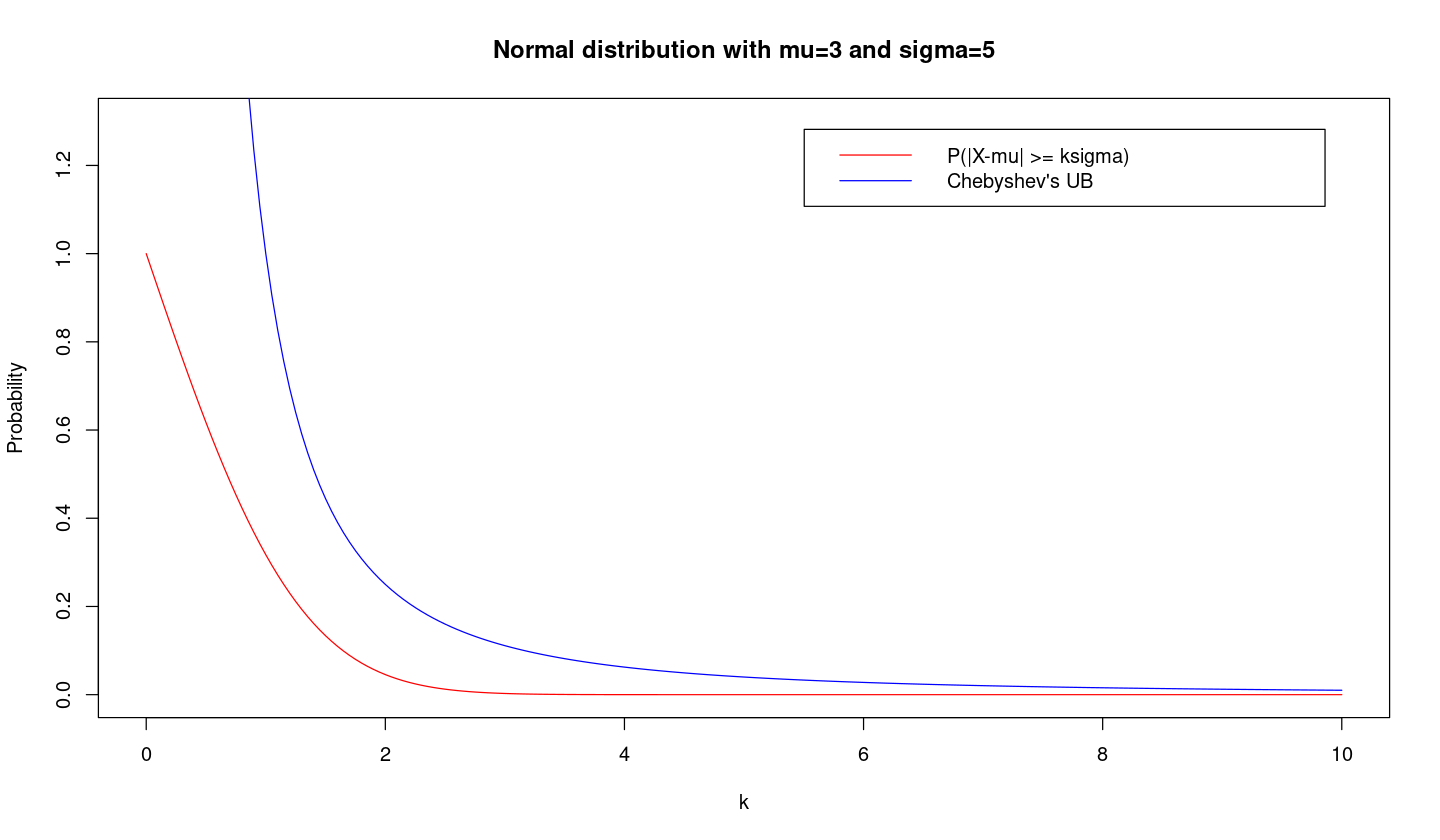

In [10]:
mu <- 3
si <- 5
x <- seq(0,10,0.05)

P <- pnorm(mu-x*si,mean=mu,sd=si) +1- pnorm(mu+x*si,mean=mu,sd=si)
plot(x,P,type='l',col='red',main=paste('Normal distribution with mu=',mu,' and sigma=',si,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,1/(x^2),col='blue')
legend('topright',inset=0.05,legend=c('P(|X-mu| >= ksigma)','Chebyshev\'s UB'),col=c('red','blue'), lty=1)

#### 3.b)

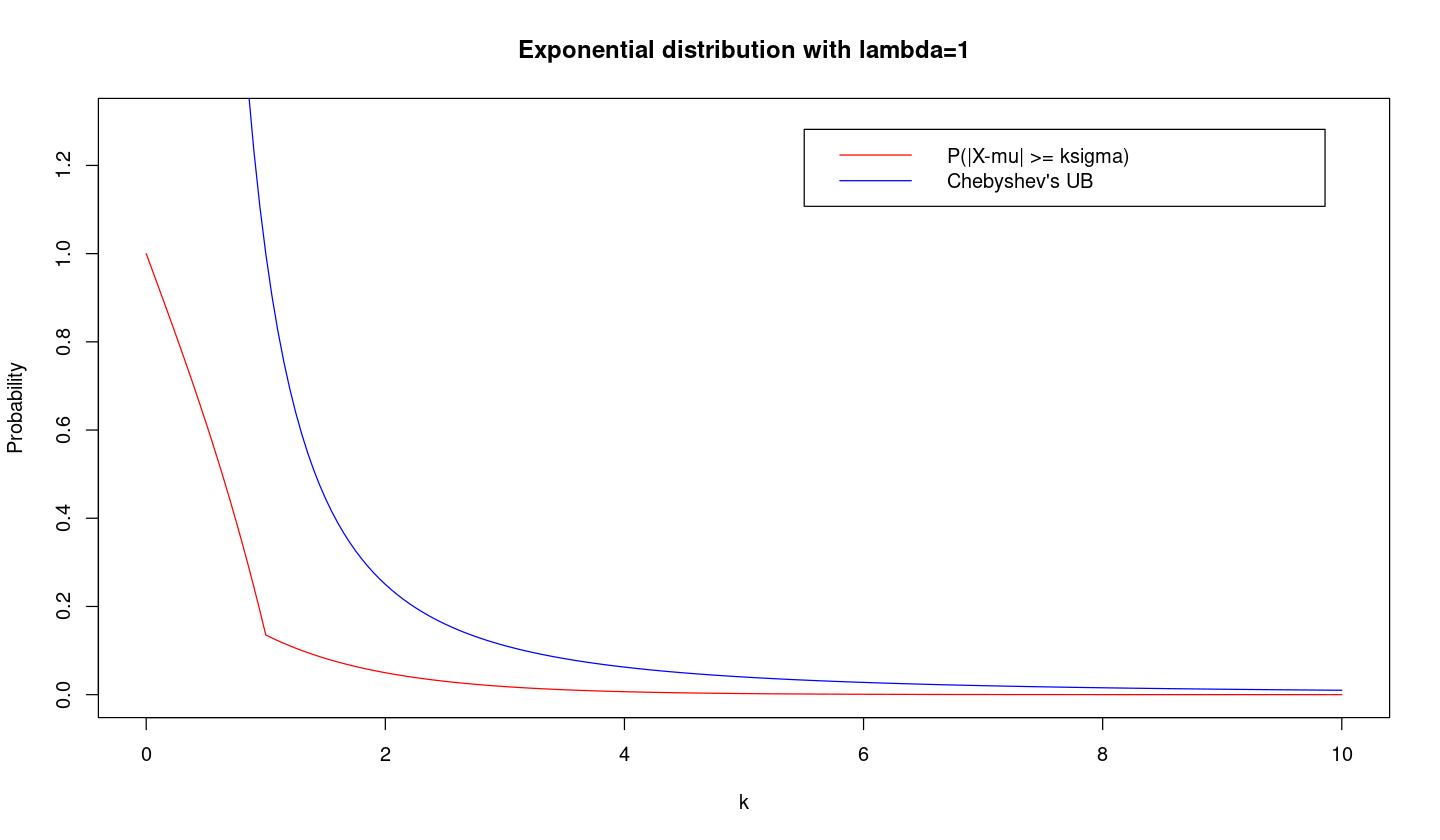

In [11]:
lambda <- 1
mu <- 1/lambda
si <- 1/lambda
x <- seq(0,10,0.05)

P <- pexp(mu-x*si,lambda) +1- pexp(mu+x*si,lambda)
plot(x,P,type='l',col='red',main=paste('Exponential distribution with lambda=',lambda,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,1/(x^2),col='blue')
legend('topright',inset=0.05,legend=c('P(|X-mu| >= ksigma)','Chebyshev\'s UB'),col=c('red','blue'), lty=1)

#### 3.c)

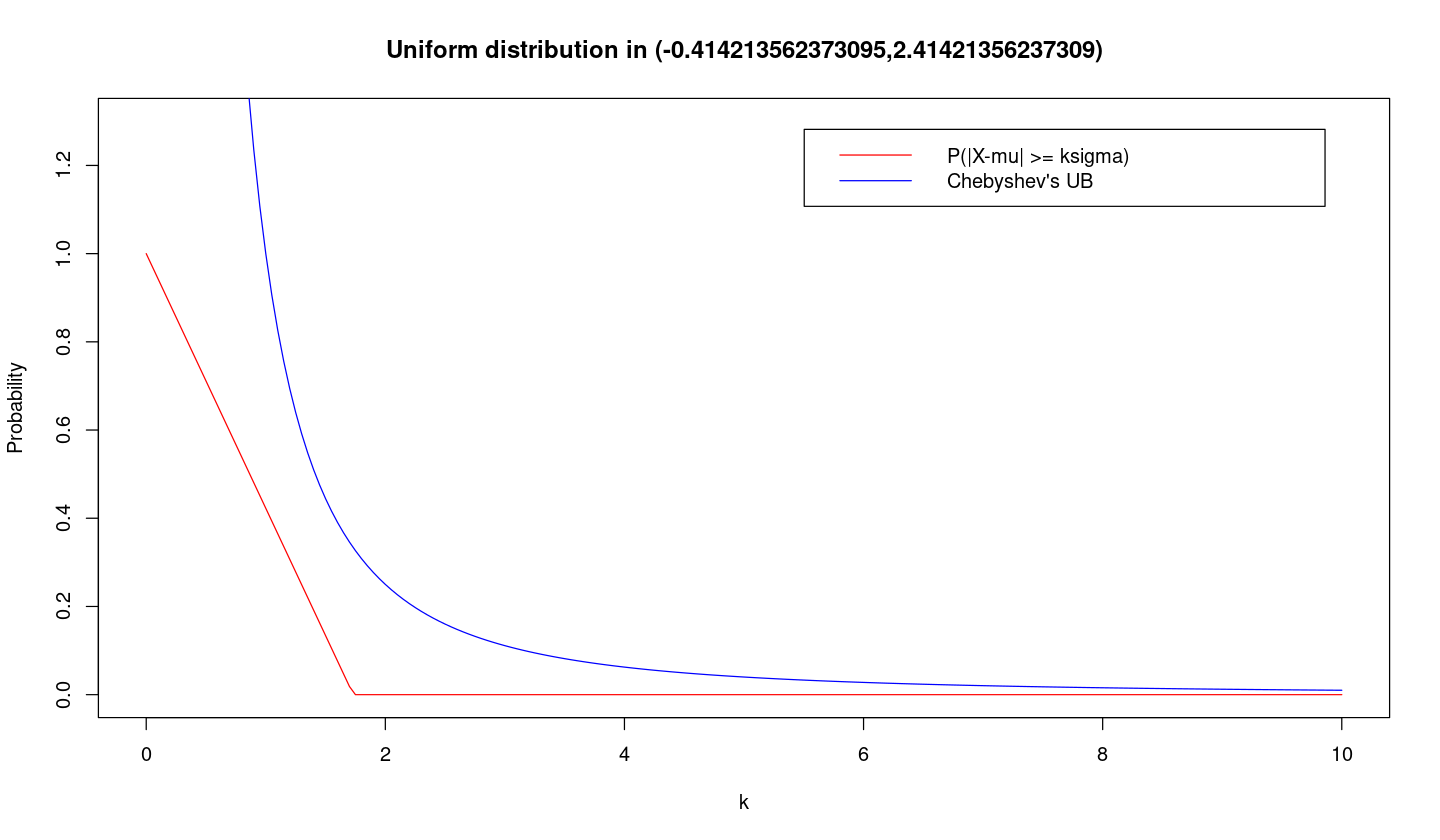

In [12]:
a <- 1-sqrt(2)
b <- 1+sqrt(2)
mu <- (a+b)/2
si <- (b-a) /sqrt(12)
x <- seq(0,10,0.05)

P <- punif(mu-x*si,a,b) +1- punif(mu+x*si,a,b)
plot(x,P,type='l',col='red',main=paste('Uniform distribution in (',a,',',b,')',sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,1/(x^2),col='blue')
legend('topright',inset=0.05,legend=c('P(|X-mu| >= ksigma)','Chebyshev\'s UB'),col=c('red','blue'), lty=1)

#### 3.d)

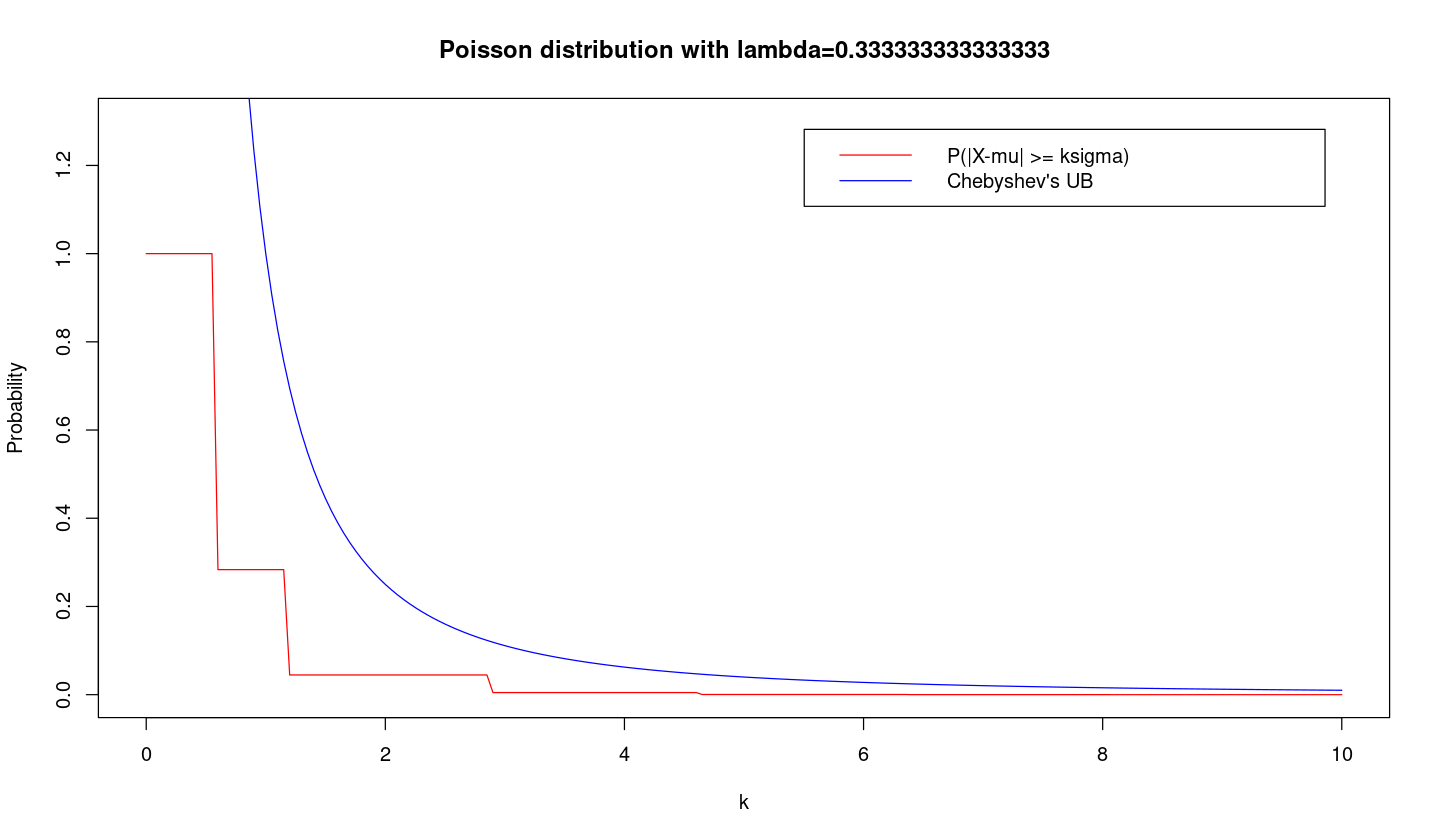

In [13]:
lambda <- 1/3
mu <- lambda
si <- sqrt(lambda)
x <- seq(0,10,0.05)

P <- ppois(mu-x*si,lambda) +1- ppois(mu+x*si,lambda)
plot(x,P,type='l',col='red',main=paste('Poisson distribution with lambda=',lambda,sep=''),
     xlab='k',ylab='Probability',ylim=c(0,1.3))
lines(x,1/(x^2),col='blue')
legend('topright',inset=0.05,legend=c('P(|X-mu| >= ksigma)','Chebyshev\'s UB'),col=c('red','blue'), lty=1)

### Exercise 4
***

In [14]:
library(tidyverse)
it <- read.csv('DATA/2020_IT_Region_Mobility_Report.csv')
it <- as_tibble(it)

de <- read.csv('DATA/2020_DE_Region_Mobility_Report.csv')
de <- as_tibble(de)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [15]:
it$week <- lubridate::week(it$date)
it$month <- lubridate::month(it$date)

de$week <- lubridate::week(de$date)
de$month <- lubridate::month(de$date)

Warning message:
“tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate.”
Warning message:
“tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate.”
Warning message:
“tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate.”
Warning message:
“tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate.”


In [16]:
it_week <- filter(it, it$sub_region_1=='') %>% group_by(week) %>% summarise(retail=mean(retail_and_recreation_percent_change_from_baseline),
                                                                 grocery= mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                                 parks= mean(parks_percent_change_from_baseline),
                                                                 stations=mean(transit_stations_percent_change_from_baseline),
                                                                 workplaces=mean(workplaces_percent_change_from_baseline),
                                                                 residential=mean(residential_percent_change_from_baseline))
de_week <- filter(de, de$sub_region_1=='') %>% group_by(week) %>% summarise(retail=mean(retail_and_recreation_percent_change_from_baseline),
                                                                 grocery= mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                                 parks= mean(parks_percent_change_from_baseline),
                                                                 stations=mean(transit_stations_percent_change_from_baseline),
                                                                 workplaces=mean(workplaces_percent_change_from_baseline),
                                                                 residential=mean(residential_percent_change_from_baseline))

In [17]:
it_month <- filter(it, it$sub_region_1=='') %>% group_by(month) %>% summarise(retail=mean(retail_and_recreation_percent_change_from_baseline),
                                                                 grocery= mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                                 parks= mean(parks_percent_change_from_baseline),
                                                                 stations=mean(transit_stations_percent_change_from_baseline),
                                                                 workplaces=mean(workplaces_percent_change_from_baseline),
                                                                 residential=mean(residential_percent_change_from_baseline))

de_month <- filter(de, de$sub_region_1=='') %>% group_by(month) %>% summarise(retail=mean(retail_and_recreation_percent_change_from_baseline),
                                                                 grocery= mean(grocery_and_pharmacy_percent_change_from_baseline),
                                                                 parks= mean(parks_percent_change_from_baseline),
                                                                 stations=mean(transit_stations_percent_change_from_baseline),
                                                                 workplaces=mean(workplaces_percent_change_from_baseline),
                                                                 residential=mean(residential_percent_change_from_baseline))

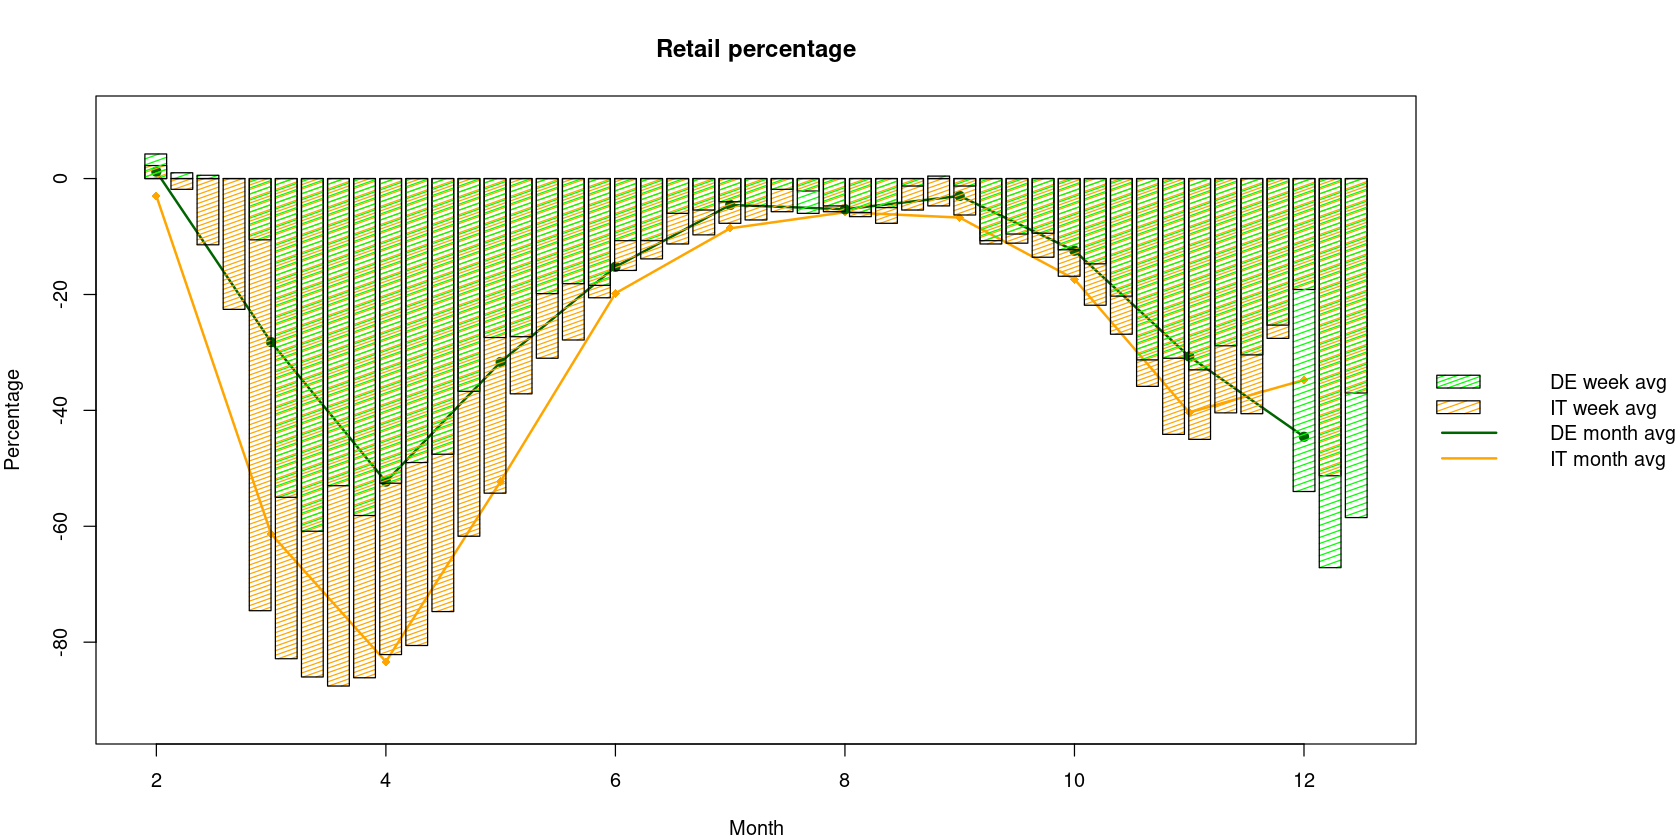

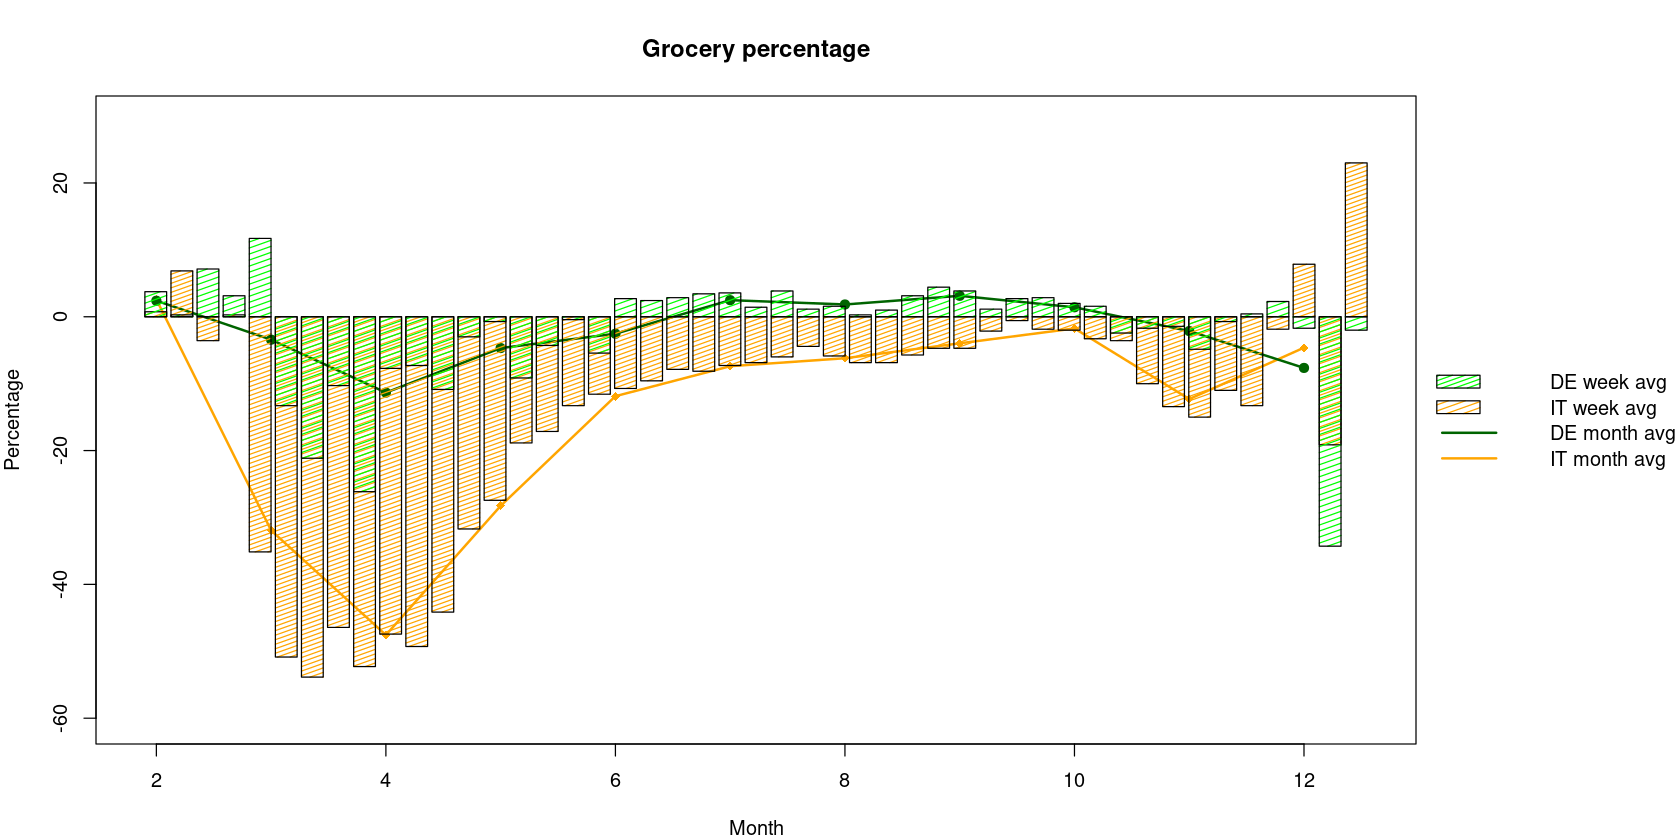

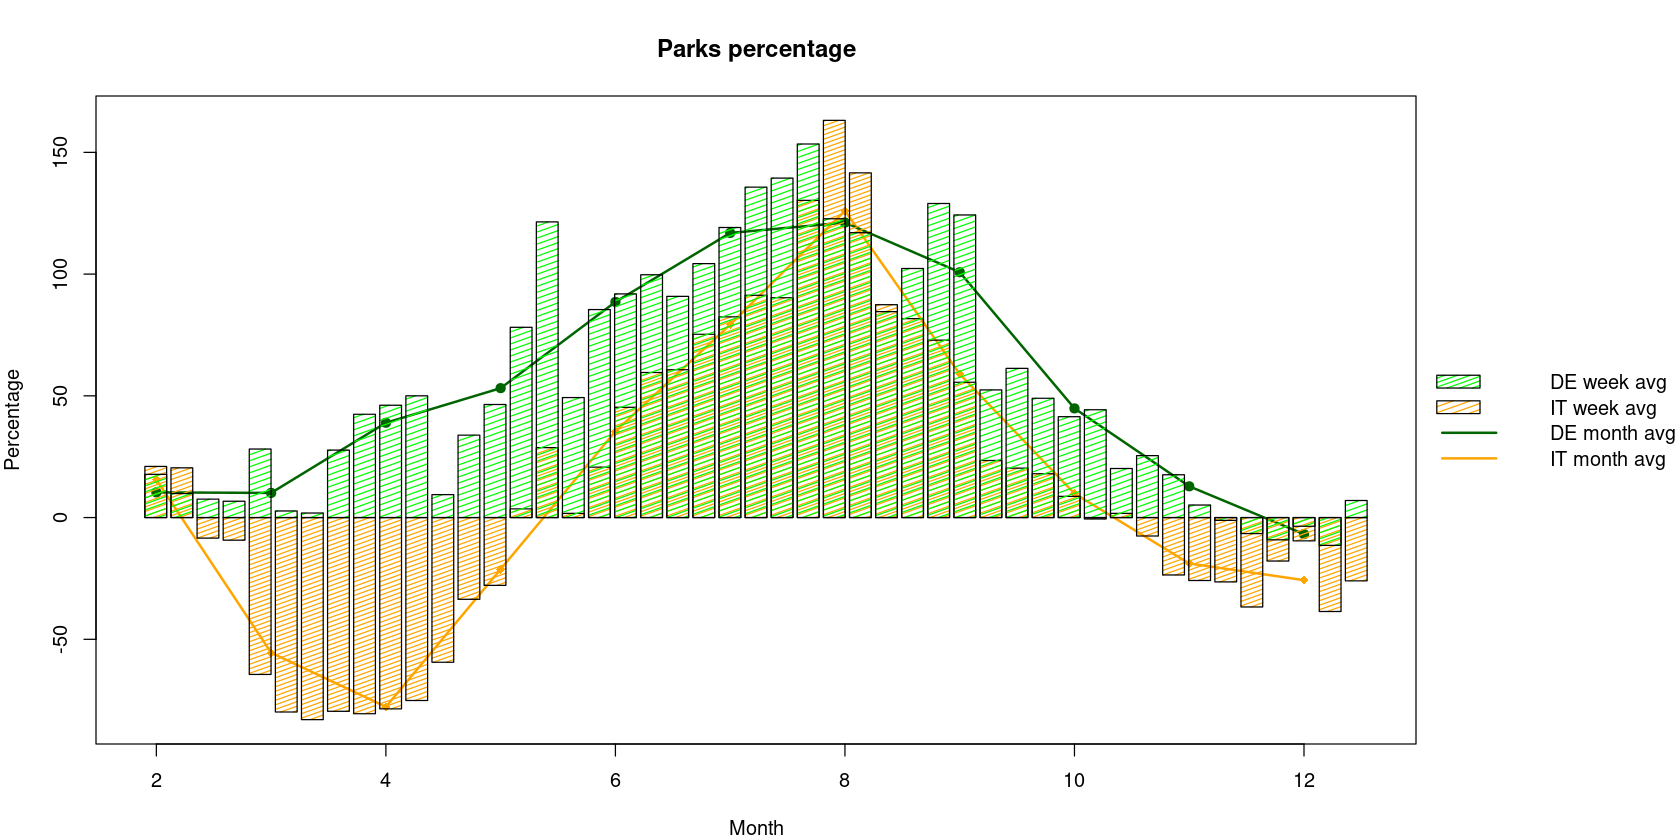

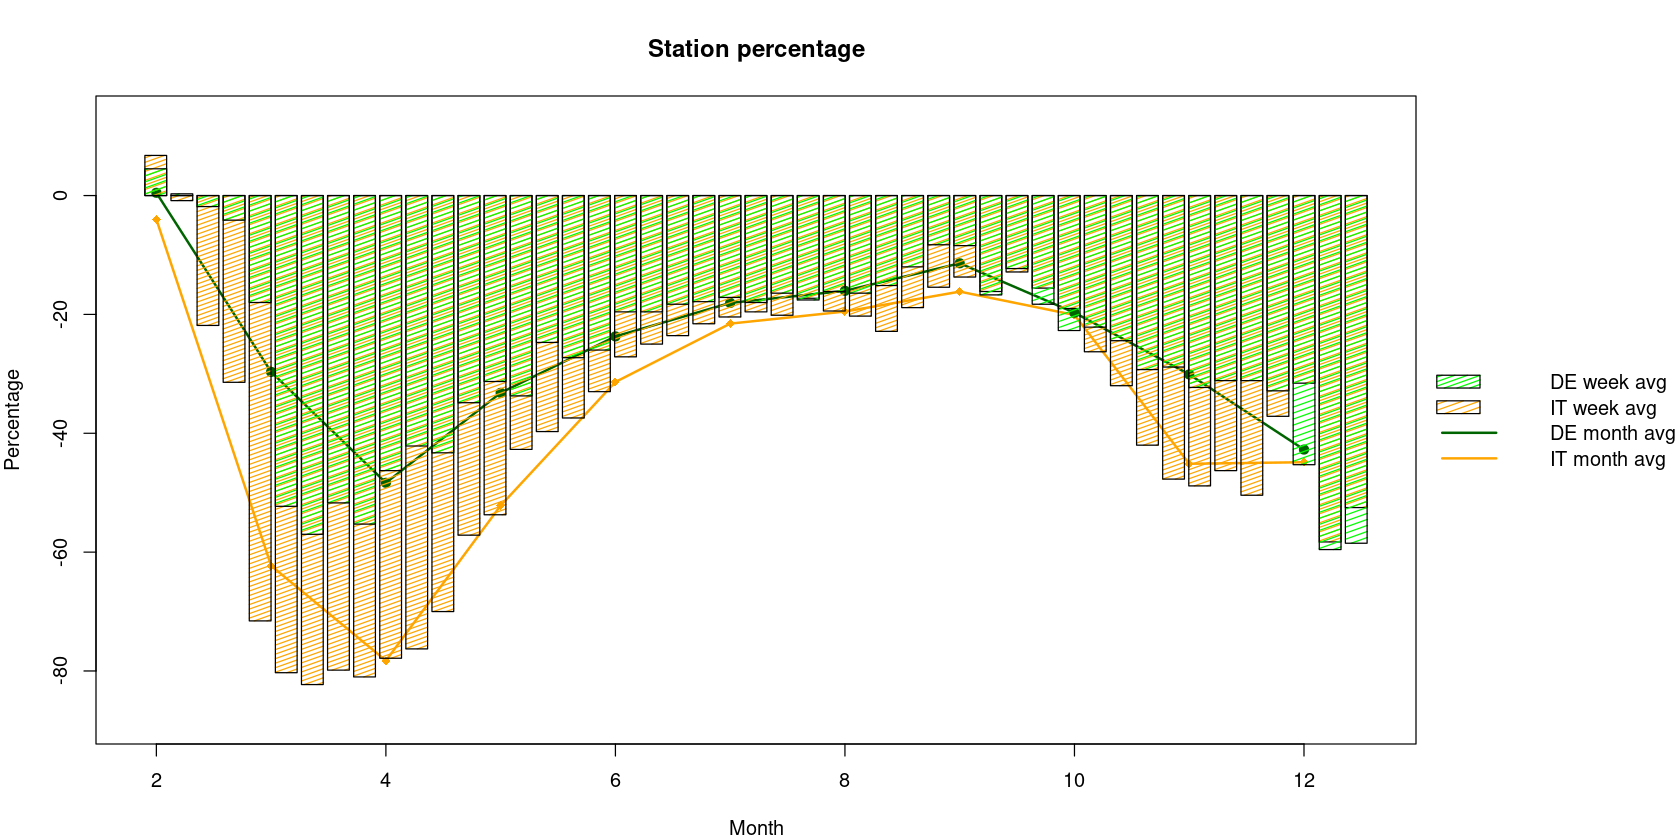

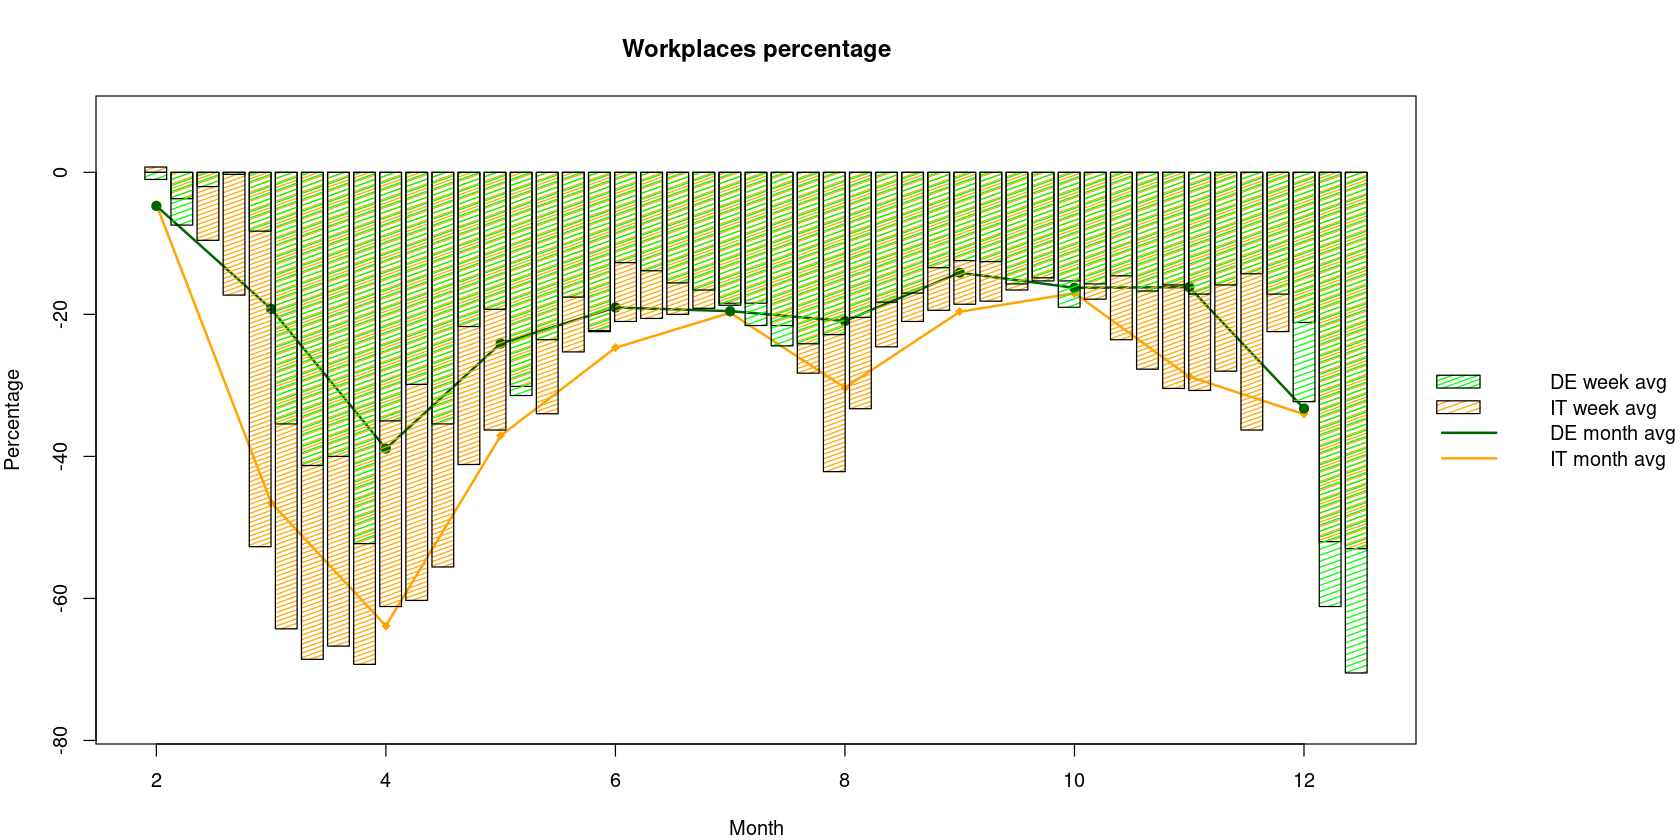

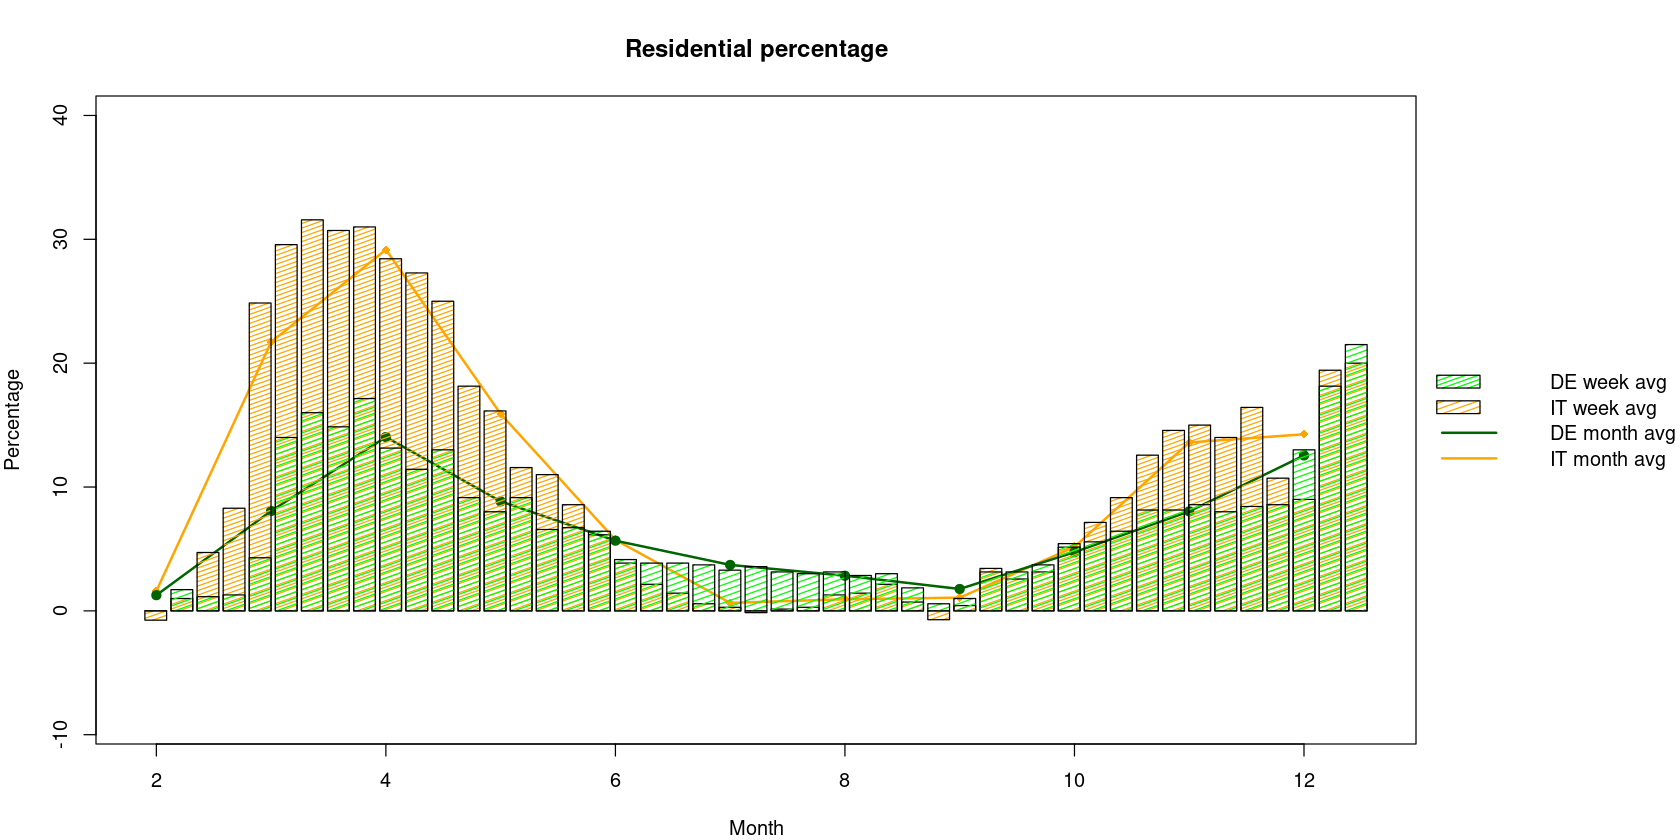

In [22]:
options(repr.plot.width=14, repr.plot.height=7)
lab <- c('Retail','Grocery','Parks','Station','Workplaces','Residential')
for (i in 1:6) {
    y_lim = c(min(it_week[[1+i]],de_week[[1+i]])-10, 
              max(it_week[[1+i]],de_week[[1+i]])+10)
    par(mar = c(4,4,4,11))
    plot(it_month$month,it_month[[1+i]],col='orange',type='l', lwd=2,
         xlim = c(1.90,12.55), ylim=y_lim, ylab='Percentage',xlab='Month',main=paste(lab[i],'percentage'),yaxs='i')
    lines(de_month$month,de_month[[1+i]],col='darkgreen',type='l',lwd=2)
    points(it_month$month,it_month[[1+i]],col='orange',pch=18)
    points(de_month$month,de_month[[1+i]],col='darkgreen',pch=19)
    par(new = T)
    barplot(it_week[[1+i]],density = 40,ylim=y_lim,col='orange',axes=FALSE)
    par(new = T)
    barplot(de_week[[1+i]],density = 30,ylim=y_lim,col='green',axes=FALSE)
    legend('right',inset=-0.41 ,legend=c('DE week avg','IT week avg','DE month avg','IT month avg'),
          pch=c(NA,NA,NA,NA),lty=c(NA,NA,1,1),col=c('green','orange','darkgreen','orange'),xpd=TRUE,
          fill=c('green','orange','white','white'), border=c('black','black',NA,NA), density=c(40,30,NA,NA),
          seg.len=1,lwd=c(NA,NA,2,2),bty='n')
}